In [2]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# two random correlated variables
v = np.random.randn(10)
w = v + np.random.randn(len(v))

# correlation using mean-centered dot products

# mean-center
vm = v-np.mean(v)
wm = w-np.mean(w)

# dot products
r_me = np.dot(vm,wm) / np.sqrt(np.dot(vm,vm)*np.dot(wm,wm))


# correlation using numpy
r_np = np.corrcoef(v,w)[0,1]


# print results
print(f'r from np.corr: {r_np:.3f}')
print(f'r from np.dot : {r_me:.3f}')

r from np.corr: 0.876
r from np.dot : 0.876


# Exe 2

In [4]:
# create random data
N = 43
r = .4
x = np.random.randn(N)
y = np.random.randn(N)
y = x*r + y*np.sqrt(1-r**2)

# r,p from numpy
r_np = np.corrcoef(x,y)[0,1]
t = r_np*np.sqrt(N-2) / np.sqrt(1-r_np**2)
p_np = stats.t.sf(np.abs(t),N-2) * 2  

# r,p from scipy
r_sp,p_sp = stats.pearsonr(x,y)

# print correlation values
print(f'r (p) from numpy: {r_np:.4f} ({p_np:.4f})')
print(f'r (p) from scipy: {r_sp:.4f} ({p_sp:.4f})')

r (p) from numpy: 0.5795 (0.0000)
r (p) from scipy: 0.5795 (0.0000)


In [5]:
def getpvals(x,y):

  # r,p from numpy
  r_np = np.corrcoef(x,y)[0,1]
  t = r_np*np.sqrt(len(x)-2) / np.sqrt(1-r_np**2)
  p_np = stats.t.sf(np.abs(t),len(x)-2) * 2  # times 2 for a two-sided test

  # r,p from scipy
  r_sp,p_sp = stats.pearsonr(x,y)

  return p_np,p_sp

In [6]:
# range of correlation values
rvals = np.linspace(0,.99,40)

# results matrix
pvalues = np.zeros((len(rvals),2))


# run the experiment
for ri in range(len(rvals)):

  # create the data
  x = np.random.randn(44)
  y = np.random.randn(44)
  y = x*rvals[ri] + y*np.sqrt(1-rvals[ri]**2)

  # get the two p-values
  pvalues[ri,:] = getpvals(x,y)

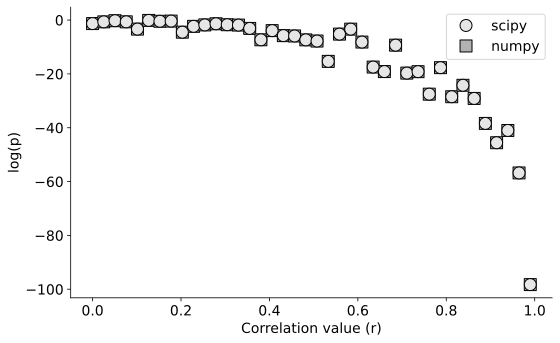

In [7]:
# plot
plt.figure(figsize=(8,5))
plt.plot(rvals,np.log(pvalues[:,1]),'ko',markersize=12,markerfacecolor=(.9,.9,.9),label='scipy')
plt.plot(rvals,np.log(pvalues[:,0]),'ks',markersize=12,markerfacecolor=(.7,.7,.7),label='numpy',zorder=-1)
plt.legend()
plt.xlabel('Correlation value (r)')
plt.ylabel('log(p)')

# display the results
plt.tight_layout()
plt.show()

# Exe 3

In [8]:
# matrix of p-values

N = 10000 # observations
M = 15 # features

# data matrix
X = np.random.randn(N,M)

# correlation matrix
R = np.corrcoef(X.T)

# confirm that it's the right shape
print(f'Correlation matrix shape: {R.shape}')

Correlation matrix shape: (15, 15)


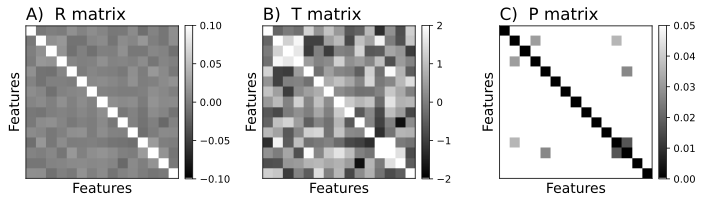

In [9]:
# compute the t-values
Tnum = R*np.sqrt(N-2)
Tden = np.sqrt(1-R**2) + np.finfo(float).eps # adding a tiny number to avoid n/0

T = Tnum / Tden

# compute the p-values
P = stats.t.sf(T,N-2)

# visualize all matrices
fig,axs = plt.subplots(1,3,figsize=(10,5))

cax = axs[0].imshow(R,vmin=-.1,vmax=.1,cmap='gray')
axs[0].set_title(r'A)  R matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[1].imshow(T,vmin=-2,vmax=2,cmap='gray')
axs[1].set_title(r'B)  T matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[2].imshow(P,vmin=0,vmax=.05,cmap='gray')
axs[2].set_title(r'C)  P matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [10]:
# the sigma matrix
Sigma = np.std(X,ddof=1,axis=0)
Sigma = np.diag(Sigma)

# compute C from R
C_me = Sigma@R@Sigma 
C_np = np.cov(X.T,ddof=1) 

# check for equality (
(C_np-C_me)
     


array([[-4.44089210e-16, -2.60208521e-18,  6.50521303e-19,
         6.93889390e-18, -5.72458747e-17, -5.20417043e-18,
         1.38777878e-17,  1.73472348e-18,  8.67361738e-18,
         2.60208521e-18, -8.67361738e-18, -8.67361738e-18,
        -6.93889390e-18,  1.04083409e-17, -6.93889390e-18],
       [-8.67361738e-19,  1.33226763e-15,  1.73472348e-18,
        -3.46944695e-17,  3.64291930e-17,  5.20417043e-18,
         1.04083409e-17,  1.04083409e-17,  5.20417043e-18,
         1.73472348e-18,  0.00000000e+00,  2.77555756e-17,
         6.50521303e-19,  1.73472348e-18,  3.46944695e-18],
       [ 6.50521303e-19,  0.00000000e+00, -1.33226763e-15,
        -4.85722573e-17,  5.20417043e-17, -1.86347248e-20,
        -8.67361738e-18,  0.00000000e+00,  1.08420217e-18,
        -1.38777878e-17,  7.80625564e-18, -8.67361738e-19,
        -1.73472348e-17, -6.50521303e-18,  8.67361738e-18],
       [ 6.93889390e-18, -3.12250226e-17, -4.85722573e-17,
        -4.88498131e-15, -3.03576608e-17, -1.84314369

In [11]:
# compute R from C
invSigma = 1/np.std(X,ddof=1,axis=0)
invSigma = np.diag(Sigma)

R_me = invSigma@C_np@invSigma


# check for equality 
(R-R_me) < 1e-16

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

# Exe 5

In [12]:
# simulation parameters
N = 1000  
M =   20  

# number of repetitions
numReps = 30


# initialize data lists
alldata = np.zeros((M,N))
corrmats = np.zeros((M,M,numReps+1))

# pure data
covars = np.linspace(-1,1,M)[:,None]
dataOG = np.random.randn(N) * covars


# random noise in each repetition
for idx in range(numReps):

  # this run's data
  thisdata = dataOG + np.random.randn(M,N)*5

  # its correlation matrix
  corrmats[:,:,idx] = np.corrcoef(thisdata)

  # sum the data
  alldata += thisdata



# correlation of data average
corrmats[:,:,-1] = np.corrcoef(alldata)


/tmp/ipykernel_4965/473149221.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


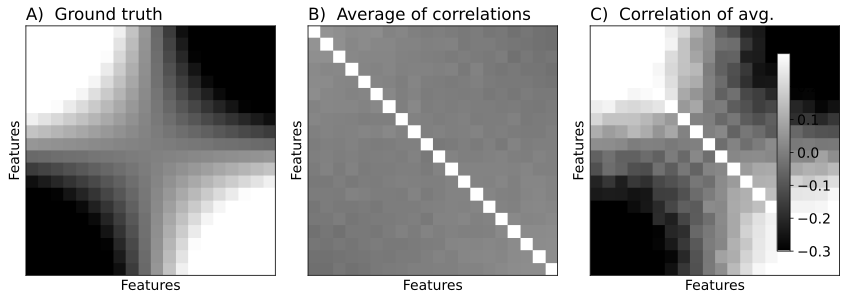

In [13]:
# plot
fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].imshow(covars@covars.T,vmin=-.3,vmax=.3,cmap='gray')
axs[0].set_title(r'A)  Ground truth')

axs[1].imshow(np.mean(corrmats[:,:,:-1],axis=2),vmin=-.3,vmax=.3,cmap='gray')
axs[1].set_title(r'B)  Average of correlations')

cax = axs[2].imshow(corrmats[:,:,-1],vmin=-.3,vmax=.3,cmap='gray')
axs[2].set_title(r'C)  Correlation of avg.')

cbar_ax = fig.add_axes([.91,.22,.015,.55])
cbar = plt.colorbar(cax,cax=cbar_ax)


# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 6

In [14]:
# re-initialize data lists
alldata = np.zeros((M,N))


# run the experiment
for idx in range(numReps):

  # this run's data 
  thisdata = np.random.randn(N)*covars + np.random.randn(M,N)

  # its corr matrix
  corrmats[:,:,idx] = np.corrcoef(thisdata)

  # store the data
  alldata += thisdata



# correlation of data average
corrmats[:,:,-1] = np.corrcoef(alldata)

/tmp/ipykernel_4965/935713016.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


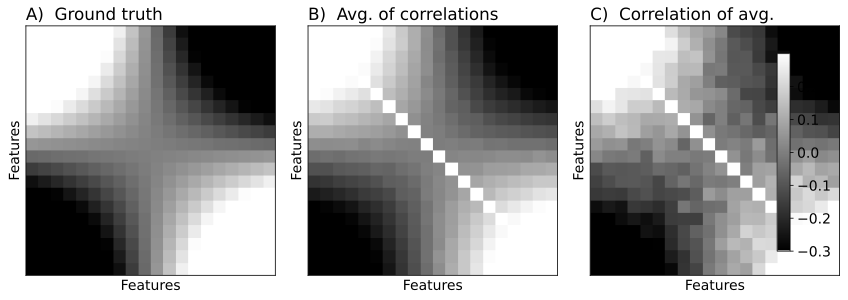

In [15]:
# plot
fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].imshow(covars@covars.T,vmin=-.3,vmax=.3,cmap='gray')
axs[0].set_title(r'A)  Ground truth')

axs[1].imshow(np.mean(corrmats[:,:,:-1],axis=2),vmin=-.3,vmax=.3,cmap='gray')
axs[1].set_title(r'B)  Avg. of correlations')

cax = axs[2].imshow(corrmats[:,:,-1],vmin=-.3,vmax=.3,cmap='gray')
axs[2].set_title(r'C)  Correlation of avg.')

cbar_ax = fig.add_axes([.91,.22,.015,.55])
cbar = plt.colorbar(cax,cax=cbar_ax)


# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()

# Exe 7

In [16]:
samplesize = 30
nSamples = 23

corrs = np.zeros(nSamples)
tres  = np.zeros(2)

# loop over experiments
for ni in range(nSamples):

  # create the data
  x = np.random.randn(samplesize)
  y = np.random.randn(samplesize)
  y = x*.1 + y*np.sqrt(1-.1**2)

  # correlation
  corrs[ni] = np.corrcoef(x,y)[0,1]

# t-test on r values
tres[0] = stats.ttest_1samp(corrs,0).statistic
tres[1] = stats.ttest_1samp(np.arctanh(corrs),0).statistic

# critical t-value
tCrit = stats.t.isf(.05/2,samplesize-2)


print(f't-value from "raw" coefficients   : {tres[0]:.4f}')
print(f't-value from Fisher-z coefficients: {tres[1]:.4f}')
print(f'Critical t-value for p<.05        : {tCrit:.4f}')
     


t-value from "raw" coefficients   : 4.3481
t-value from Fisher-z coefficients: 4.2984
Critical t-value for p<.05        : 2.0484


In [17]:
# for a wider range of r values
rs = np.linspace(.01,.5,21)
samplesize = 30
nSamples = 23

corrs = np.zeros((len(rs),nSamples))
tres  = np.zeros((len(rs),2))

# critical t 
tCrit = stats.t.isf(.05/2,samplesize-2)


# the experiment
for ri,r in enumerate(rs):

  # loop over experiments
  for ni in range(nSamples):

    # create the data
    x = np.random.randn(samplesize)
    y = np.random.randn(samplesize)
    y = x*r + y*np.sqrt(1-r**2)

    # correlation
    corrs[ri,ni] = np.corrcoef(x,y)[0,1]

  # now for a t-test on r values
  tres[ri,0] = stats.ttest_1samp(corrs[ri,:],0).statistic
  tres[ri,1] = stats.ttest_1samp(np.arctanh(corrs[ri,:]),0).statistic


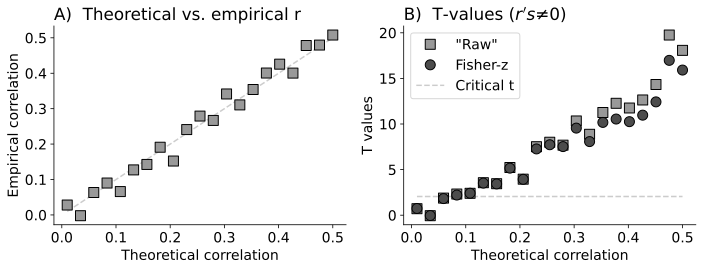

In [18]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(rs,np.mean(corrs,axis=1),'ks',markersize=10,markerfacecolor=(.6,.6,.6))
axs[0].plot([rs[0],rs[-1]],[rs[0],rs[-1]],'--',color=(.8,.8,.8),zorder=-3)
axs[0].set(xlabel='Theoretical correlation',ylabel='Empirical correlation')
axs[0].set_title(r'A)  Theoretical vs. empirical r')

axs[1].plot(rs,tres[:,0],'ks',markersize=10,markerfacecolor=(.6,.6,.6),label='"Raw"')
axs[1].plot(rs,tres[:,1],'ko',markersize=10,markerfacecolor=(.3,.3,.3),label='Fisher-z')
axs[1].plot(rs,np.full(len(rs),tCrit),'--',color=(.8,.8,.8),zorder=-3,label='Critical t')
axs[1].legend()
axs[1].set(xlabel='Theoretical correlation',ylabel='T values')
axs[1].set_title(r"B)  T-values ($r's \ne 0$)")

# display the figure
plt.tight_layout()
plt.show()

# Exe 8

In [19]:
from scipy import spatial 

# generate some correlated random data
x = np.random.randn(40)
y = x + np.random.randn(len(x))

# manual cosine similarity
cs_num = sum(x*y)
cs_den = np.sqrt(sum(x*x)) * np.sqrt(sum(y*y))
cs_me = cs_num / cs_den


# using the  distance function in the scipy.spatial library
cs_sp = 1-spatial.distance.cosine(x,y)


print(f'Manual result: {cs_me:.3f}')
print(f'Scipy.spatial: {cs_sp:.3f}')

Manual result: 0.571
Scipy.spatial: 0.571


# Exe 9

In [20]:
#  range of requested correlation coefficients
rs = np.linspace(-1,1,100)

# sample size
N = 500


# initialize output matrix
corrs = np.zeros((len(rs),2))


# loop over a range of r values
for ri in range(len(rs)):

  # generate data
  x = np.random.randn(N)
  y = x*rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)

  # mean de-centering
  x = x-10

  # compute correlation
  corrs[ri,0] = np.corrcoef(x,y)[0,1]

  # compute cosine similarity
  corrs[ri,1] = 1-spatial.distance.cosine(x,y)

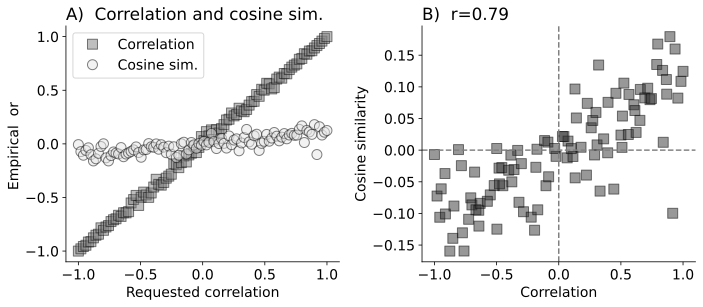

In [21]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4.5))

axs[0].plot(rs,corrs[:,0],'ks',markersize=10,markerfacecolor=(.5,.5,.5),alpha=.5,label='Correlation')
axs[0].plot(rs,corrs[:,1],'ko',markersize=10,markerfacecolor=(.9,.9,.9),alpha=.5,label='Cosine sim.')
axs[0].legend()
axs[0].set(xlabel='Requested correlation',ylabel=r'Empirical  or ')
axs[0].set_title(r'A)  Correlation and cosine sim.')

axs[1].plot(corrs[:,0],corrs[:,1],'ks',markersize=10,markerfacecolor=(.2,.2,.2),alpha=.5)
axs[1].axhline(y=0,color='gray',linestyle='--')
axs[1].axvline(x=0,color='gray',linestyle='--')
axs[1].set(xlabel='Correlation',ylabel='Cosine similarity')
axs[1].set_title(rf'B)  r={np.corrcoef(corrs.T)[1,0]:.2f}')

# display the figure
plt.tight_layout()
plt.show()

# Exe 10

In [22]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin','Car Name']

data = pd.read_csv(url,delim_whitespace=True,names=column_names, na_values="?")
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


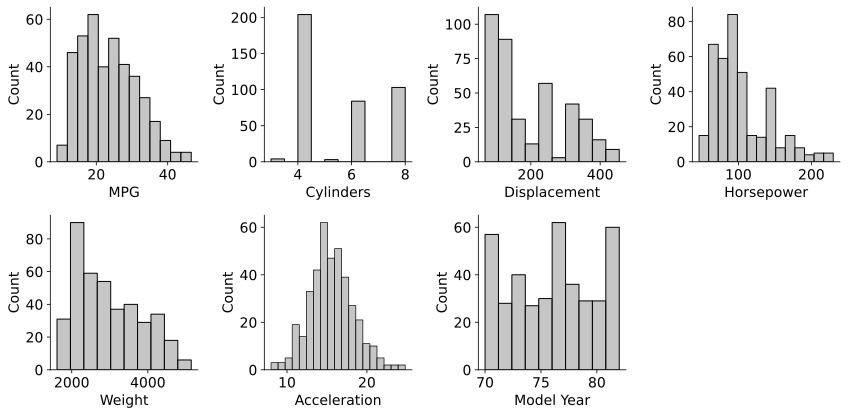

In [23]:
# distributions

# include only numerical variables
data_numerical = data.drop(columns=['Car Name','Origin'])

# draw histograms with seaborn
fig,axs = plt.subplots(2,4,figsize=(12,6))
for a,column in zip(axs.flatten(),data_numerical.columns):
  sns.histplot(data=data_numerical, x=column, ax=a, color=(.7,.7,.7))

# only 7 columns, so switch off the empty 8th :P
axs[-1,-1].axis('off')

# display the figure
plt.tight_layout()
plt.show()

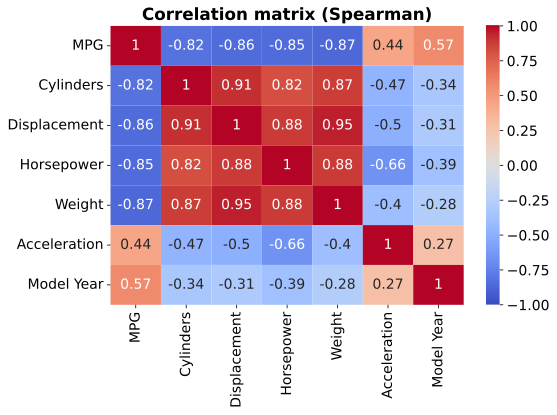

In [24]:
# corr matrix
R = data_numerical.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(R, annot=True, cmap='coolwarm',vmin=-1,
            xticklabels=R.columns,yticklabels=R.columns)

plt.title('Correlation matrix (Spearman)',loc='center',weight='bold')

# display the figure
plt.tight_layout()
plt.show()